<a href="https://colab.research.google.com/github/RamyaGuru/jarvis-tools-notebooks/blob/master/AIMS2022_Python_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python Basics
Python is a highly modular language, which makes the use of external libraries to perform certian operations. We'll first go over the very basics of the pandas and plotly libraries, which will, respectively, be used for data-handling and plotting in the following example.

##Data-handling with Pandas
Pandas is a Python package that defines the DataFrame object. DataFrames are ideal for reading, writing, storing, and manipulating information in a tabular format (i.e. information labelled by a row index and a column heading).


First, we'll fetch the JARVIS-DFT 3D Database, which contains the relaxed structures and DFT properties for about 55,000 compounds using the ``matminer`` Python package. First, we need to install the matminer package using the command below. NOTE: the leading exclamation point (!) 

In [1]:
!pip install matminer

from matminer.datasets.convenience_loaders import load_jarvis_dft_3d

dft3d_df = load_jarvis_dft_3d()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 6.3 MB/s 
     |████████████████████████████████| 5.2 MB 40.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.4 MB 68.6 MB/s 
     |████████████████████████████████| 6.4 MB 26.2 MB/s 
     |████████████████████████████████| 829 kB 59.5 MB/s 
     |████████████████████████████████| 80 kB 12.4 MB/s 
     |████████████████████████████████| 1.4 MB 50.0 MB/s 
     |████████████████████████████████| 1.4 MB 60.1 MB/s 
     |████████████████████████████████| 62 kB 2.1 MB/s 
     |████████████████████████████████| 65 kB 2.7 MB/s 
     |████████████████████████████████| 209 kB 81.1 MB/s 
     |████████████████████████████████| 40.6 MB 1.3 MB/s 
  Installing build dependencies ... done
 

Fetching jarvis_dft_3d.json.gz from https://ndownloader.figshare.com/files/13376507 to /usr/local/lib/python3.7/dist-packages/matminer/datasets/jarvis_dft_3d.json.gz


Fetching https://ndownloader.figshare.com/files/13376507 in MB: 30.670848MB [00:00, 492.77MB/s]                


In [2]:
print(dft3d_df.columns)

Index(['epsilon_x opt', 'epsilon_y opt', 'epsilon_z opt', 'structure',
       'e_form', 'shear modulus', 'structure initial', 'jid', 'bulk modulus',
       'gap tbmbj', 'epsilon_x tbmbj', 'epsilon_y tbmbj', 'epsilon_z tbmbj',
       'mpid', 'gap opt', 'composition'],
      dtype='object')


In [3]:
'''
dropna(): Drop rows that contain any NaN (not a number) values.
'''
dft3d_df = dft3d_df.dropna()

#Fetch the first 50 rows
dft3d_50 = dft3d_df.head(50)

dft3d_50

,epsilon_x opt,epsilon_y opt,epsilon_z opt,structure,e_form,shear modulus,structure initial,jid,bulk modulus,gap tbmbj,epsilon_x tbmbj,epsilon_y tbmbj,epsilon_z tbmbj,mpid,gap opt,composition
75,21.0673,29.1228,17.6066,"[[3.1506963 4.30596127 3.56982179] As, [0.384...",0.025,19.993,"[[3.17888147 4.36479751 3.69558323] As, [0.381...",JVASP-11997,34.556,0.6495,15.0619,14.9875,12.4788,mp-158,0.0221,(As)
80,13.8023,38.1854,35.5515,"[[0.37213617 3.67987527 0.87369073] H, [1.4889...",-1.184,25.667,"[[0.34436223 3.69323659 0.87470146] H, [1.4990...",JVASP-12002,78.478,0.0083,16.5818,61.5222,53.1874,mp-24242,0.0038,"(H, O, F, Cu)"
83,6.3933,6.9466,6.3796,"[[ 0.92796672 1.82915421 10.16747299] O, [2.7...",-2.086,52.420,"[[ 0.938753 1.84002706 10.93783201] O, [2.8...",JVASP-12010,75.067,2.4642,5.2402,5.8492,5.3897,mp-510584,1.9202,"(O, Mo)"
92,6.0838,6.0838,6.5652,"[[0. 0. 0.] Ag, [2.22040369 2.22040369 0. ...",-0.204,5.947,"[[0. 0. 0.] Ag, [2.2945515 2.2945515 0. ...",JVASP-12023,17.478,2.7025,4.5320,4.5323,4.9101,mp-567809,1.2599,"(Ag, I)"
95,7.0316,6.3127,5.2274,"[[0. 2.06587432 0.88869064] Zr, [1.814...",-1.768,37.120,"[[0. 2.085838 0.88566666] Zr, [1.819...",JVASP-12027,54.633,2.2441,6.0366,5.5260,4.6886,mp-570157,1.8723,"(Zr, Br, N)"
96,4.6738,4.7460,4.7722,"[[1.41349448 4.71501305 5.06256213] In, [0.289...",-0.830,9.047,"[[8.49448596 4.73948454 6.27818672] In, [0.290...",JVASP-12028,16.378,3.7113,3.6685,3.7637,3.7977,mp-570219,2.3104,"(In, Br)"
99,5.0636,5.0798,4.9797,"[[1.50785766 1.02477434 2.93571664] Y, [ 7.555...",-1.473,7.687,"[[1.646224 1.11881123 3.20510836] Y, [ 8.247...",JVASP-12033,12.578,2.8863,5.5443,5.5399,5.5646,mp-571442,2.6760,"(Y, I)"
103,2.8447,2.9459,2.7976,"[[1.17206677 8.41802227 0.93781225] Al, [0.259...",-2.430,73.973,"[[0.2515101 8.52548747 0.940367 ] Al, [0.057...",JVASP-12038,110.656,6.9515,2.4188,2.4769,2.3750,mp-625055,5.1686,"(Al, H, O)"
108,4.9033,5.1118,5.1243,"[[ 2.54192839 -1.33085318 -0.81347227] Bi, [4....",-1.969,38.960,"[[ 2.58162693 -1.32106185 -0.80748743] Bi, [4....",JVASP-12051,96.300,4.4734,3.6415,3.7771,3.7842,mp-759883,2.9829,"(Bi, O, F)"
115,16.9750,14.0779,15.5189,"[[-1.3982931 -1.34418681 -3.44903549] Cu, [ 0...",-0.716,43.800,"[[-1.3943665 -1.40808459 -3.46870699] Cu, [ 0...",JVASP-12059,80.133,0.0117,17.6582,21.6400,18.3388,mp-996956,0.0087,"(Cu, H, O)"


In [12]:
#Get list of compositions in the feature vector
!pip install -U jarvis-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 962 kB 7.7 MB/s 


In [26]:
from jarvis.db.figshare import data
from jarvis.core.atoms import Atoms

dft_3d = data("dft_3d")

comp_list = []
for indx, d in dft3d_50.iterrows():
  entry = next(j for j in dft_3d if j["jid"] == d["jid"])
  comp = Atoms.from_dict(entry['atoms']).composition.reduced_formula
  comp_list.append(comp)

print(comp_list)

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.
['As', 'CuHOF', 'MoO3', 'AgI', 'ZrBrN', 'InBr3', 'YI3', 'AlHO2', 'BiOF', 'CuHO2', 'TiClO', 'VCuO4', 'ScBrO', 'ZnCu3H6Cl2O6', 'VOF3', 'ZnCl2', 'ScHO2', 'ZrMo2O8', 'BaCaI4', 'CaPbI4', 'YBr3', 'NdIO', 'Li2WS4', 'SnO2', 'SnO2', 'CoF2', 'GaS', 'RbPS3', 'BeF2', 'BeO', 'CO2', 'CaCl2', 'SrClF', 'SrBrF', 'SrCl2', 'CaCl2', 'CaClF', 'NaHF2', 'Bi2SO2', 'BrF5', 'IF7', 'AsF3', 'KSc2F7', 'CClF3', 'K2MgF4', 'LiMgP', 'H4BrN', 'NaHS', 'SrAl2Te4', 'AgAsF6']


In [4]:
#Form feature vector from the scalar properties in the dataframe
scalar_cols = [col for col in dft3d_50.columns if col not in ['structure', 'structure initial', 'jid', 'mpid', 'composition']]

feature_vect = dft3d_50[scalar_cols].to_numpy()

feature_vect

array([[ 2.106730e+01,  2.912280e+01,  1.760660e+01,  2.500000e-02,
         1.999300e+01,  3.455600e+01,  6.495000e-01,  1.506190e+01,
         1.498750e+01,  1.247880e+01,  2.210000e-02],
       [ 1.380230e+01,  3.818540e+01,  3.555150e+01, -1.184000e+00,
         2.566700e+01,  7.847800e+01,  8.300000e-03,  1.658180e+01,
         6.152220e+01,  5.318740e+01,  3.800000e-03],
       [ 6.393300e+00,  6.946600e+00,  6.379600e+00, -2.086000e+00,
         5.242000e+01,  7.506700e+01,  2.464200e+00,  5.240200e+00,
         5.849200e+00,  5.389700e+00,  1.920200e+00],
       [ 6.083800e+00,  6.083800e+00,  6.565200e+00, -2.040000e-01,
         5.947000e+00,  1.747800e+01,  2.702500e+00,  4.532000e+00,
         4.532300e+00,  4.910100e+00,  1.259900e+00],
       [ 7.031600e+00,  6.312700e+00,  5.227400e+00, -1.768000e+00,
         3.712000e+01,  5.463300e+01,  2.244100e+00,  6.036600e+00,
         5.526000e+00,  4.688600e+00,  1.872300e+00],
       [ 4.673800e+00,  4.746000e+00,  4.772200e+0

In [5]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from sklearn.cluster import KMeans
from sklearn import preprocessing as pp

'''
Scale feature vector: pre-processing step such that features have zero mean and 
unit variance
''' 
scaler = pp.StandardScaler().fit(feature_vect)

feat_vec_scale = scaler.transform(feature_vect)

print('mean: ', feat_vec_scale.mean(axis=0))
print('std. deviation: ', feat_vec_scale.std(axis=0))

mean:  [-1.33226763e-17  5.44009282e-17  1.47659662e-16  7.75768338e-17
  2.04281037e-16  3.33066907e-18  1.84297022e-16 -2.77555756e-17
 -5.10702591e-17 -3.88578059e-17  1.53210777e-16]
std. deviation:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[3 3 0 0 0 0 0 1 0 3 3 3 1 3 0 0 1 0 0 0 0 1 0 0 0 2 0 0 1 4 1 1 1 1 1 1 1
 1 0 0 0 1 1 1 1 0 0 0 0 0]


In [14]:
#Fit K-means model

K = 5; #CHANGE the number of clusters generated
kmeans = KMeans(n_clusters=K).fit(feat_vec_scale) #CHANGE to the unscaled/un-whitened feature_vect to see what happens!
lbl = kmeans.labels_
centers = kmeans.cluster_centers_
y_kmeans = kmeans.predict(feat_vec_scale)
print(y_kmeans)

[1 1 4 4 4 4 4 0 4 1 1 1 0 1 4 4 0 4 4 4 4 0 4 4 4 2 4 4 0 3 0 0 0 0 0 0 0
 0 4 4 4 0 0 0 0 4 4 4 4 4]


In [39]:
#Print contents of each cluster
import numpy as np

for k in range(K): #For each generated cluster
    pos= [n for (n,m) in enumerate(lbl) if m==k] #Get the indices in the labels vector which point ot that cluster
    compGrp = np.array(comp_list)[pos]
    print('Generated Compound Cluster #{}'.format(k+1))
    print(compGrp)
    print('mean feature values of the cluster:')
    print([{f:m} for f,m in zip(scalar_cols, centers[k])])
    print('\n')

Generated Compound Cluster #1
['AlHO2' 'ScBrO' 'ScHO2' 'NdIO' 'BeF2' 'CO2' 'CaCl2' 'SrClF' 'SrBrF'
 'SrCl2' 'CaCl2' 'CaClF' 'NaHF2' 'AsF3' 'KSc2F7' 'CClF3' 'K2MgF4']
mean feature values of the cluster:
[{'epsilon_x opt': -0.49856046466816817}, {'epsilon_y opt': -0.44987579963068974}, {'epsilon_z opt': -0.40449841660578467}, {'e_form': -0.9600209024705456}, {'shear modulus': -0.0472778785120525}, {'bulk modulus': -0.06203775122462261}, {'gap tbmbj': 1.028887385213975}, {'epsilon_x tbmbj': -0.4384430194885642}, {'epsilon_y tbmbj': -0.35688308637197885}, {'epsilon_z tbmbj': -0.29937843629234284}, {'gap opt': 1.0672560059995477}]


Generated Compound Cluster #2
['As' 'CuHOF' 'CuHO2' 'TiClO' 'VCuO4' 'ZnCu3H6Cl2O6']
mean feature values of the cluster:
[{'epsilon_x opt': 1.5460966069354574}, {'epsilon_y opt': 1.4686644814695633}, {'epsilon_z opt': 0.9422520388468436}, {'e_form': 0.7066357979266257}, {'shear modulus': 0.28342763572201696}, {'bulk modulus': 0.43293069655804395}, {'gap tbmbj': -

PCA(n_components=2)


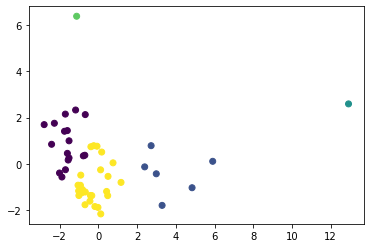

In [38]:
# Plot samples against first two principal components, colored by their cluster
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(feat_vec_scale)
print(pca)
comp_dim = pca.transform(feat_vec_scale)
plt.figure()
plt.scatter(comp_dim[:,0], comp_dim[:,1], c=y_kmeans) 
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

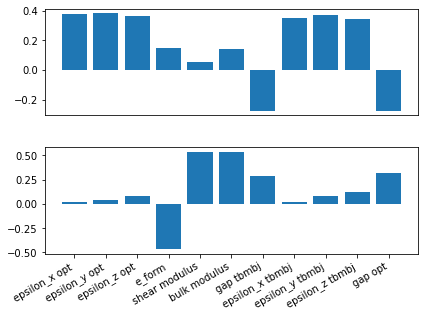

In [61]:
# Show the weights of different features in the first two principal components

pca_weights = pca.components_
fig, (ax1,ax2) = plt.subplots(2,1)
fig.tight_layout()
ax1.bar(scalar_cols,pca_weights[0])
ax1.set_xticks([])
ax2.bar(scalar_cols,pca_weights[1])
plt.xticks(rotation=30, ha='right')